<a href="https://colab.research.google.com/github/thanaphon/ComputationalSC/blob/master/LAB_9_Ordinary_Differential_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB 9: Ordinary Differential Equation

## ให้นักศึกษาเขียนชื่อ และรหัสนักศึกษาลงใน jupyter notebook

## Name:  

## StudentID: 

## Section: 

วัตถุประสงค์:

1) เข้าใจถึง concept ของ sequence และการโมเดลการเปลี่ยนแปลงของ sequence โดยอาศัย ODE 

2) สามารถแปลง differential equation ที่โจทย์กำหนดให้ ให้อยู่ในรูปของ model function 

3) สามารถเขียน ODE solver โดยอาศัย Euler's method และ midpoint medthod ได้ และเข้าใจถึงข้อแตกต่างของทั้งสองวิธี รวมถึงข้อดีข้อเสีย

4) ทดลองใช้ module odeint  ในการแก้สมการ ODE  


### Difference equations


*   For sequences occuring in modeling of real-world phenomena, there is seldom a formula for the  n -th term
*   However, we can often set up one or more equations governing the sequence. Such equations are called difference equations

* With a computer it is then very easy to generate the sequence by solving the difference equations

* Difference equations have lots of applications and are very easy to solve on a computer, but often complicated or impossible to solve for  $x_n$  (as a formula) by pen and paper!

* The programs require only loops and arrays

## Problem formulation

โจทย์กำหนดให้:   $\frac{d(y)}{d(t)} = f(y,t)$  และ ค่าเริ่มต้น $y(t_0) = y_0$

ให้หา function $y(t)$ ซึ่ง derivative ของ $y$ เท่ากับ $f$ ที่โจทย์กำหนดให้  


## 1) Numerical Solution:   Euler's method 

กำหนด $y_0$  เราสามารถใช้สมการ update ในการคำนวณ sequence $y_n$   ได้โดยอาศัยสมการ

$$ \large  y_{n+1} = y_n + h*f(y_n,t_n)    $$



พิสูจน์: 

กำหนดให้    $t_{n+1} = t_n + h $   โดยที่ $h$ คือ step size ของ sequence $t$

$y_n \approx  y(t_n)$

$\frac{dy(t_n)}{dt} =   \frac{ y(t_n + h)  - y(t_n)}{h}$

$\frac{y(t_n+1) - y(t_n)}{h} \approx f( y(t_n),t_n)$

$y_{n+1} = y_n + h*f(y_n,t_n)$

### จาก update equation ที่กำหนดให้  ให้นักศึกษา เติม code ที่ขาดไป ให้สมบูรณ์

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def ode1(F, t0, h, tfinal, y0 ):
  '''
  F is first order EQ
  t0  is the beginning time 
  h   is the step size
  tfinal is the last time
  y0  is the initial condition
  '''
  
  #Initialize values 
  #กำหนดตัวแปรสำหรับเก็บ sequence ของผลลัพธ์
  yout = []        
  #เพิ่ม y0 เป็นค่าเเรกของ sequence 
  yout.append(y0)   
  #สร้าง linspace ของ time domain กำหนดให้เริ่มต้นจาก t0 จนถึง t_final โดยให้ค่าเพิ่มที่ละ h หน่วย
  T = np.linspace(t0,tfinal,int((tfinal-t0) / h)+1)  
  
  y = y0
  
  # สำหรับแต่ละค่า ti ใน array T (สำหรับแต่ละ time step)
  for ti in T[1:]:
    # ใช้สมการของ Euler ในการ update sequence y 
    # ให้นักศึกษาเติม code ให้สมบูรณ์
    
   
    
  return (T,yout)


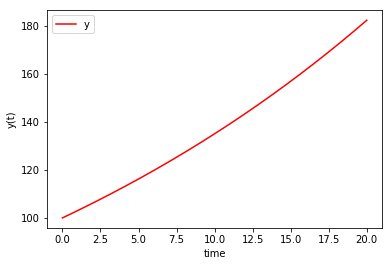

In [0]:
# ตัวอย่าง โมเดลของ compound interest problem (ดอกเบี้ย 3 %) นักศึกษาสามารถเขียน function model เหล่านี้ในรูปของ lambda function ได้เช่นเดียวกัน
def model(y,t):
  k = 0.03
  dydt = k*y
  return dydt

T, y = ode1(model, 0, 0.01, 20 , y0=100)   # ทำการ solve หา sequence ของ y_0 .... y_20 โดยให้ค่าเริ่มต้น y_0 = 100
plt.plot(T,y,'r',label = 'y')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()


## 2 Numerical solution: Midpoint method

กำหนด $y_0$  เราสามารถใช้สมการ update ในการคำนวณ sequence $y_n$   ได้โดยอาศัยสมการ

$$ \large y_{n+1} = y_n +  h*s_2$$

โดยที่ 

$s_2 = f(y_n+\frac{h}{2}*s_1  ,  t_n+\frac{h}{2} )$

$s_1 = f(y_n,  t_n )$

IDEA: ใช้อัตราการเปลี่ยนแปลงที่ตำแหน่งกึ่งกลาง ในการ update (เสมือนกับการทำ Euler's update สองครั้ง) 

ข้อดีคือลดความคลาดเคลื่อนในกรณีที่  $y'$ นั้นมีการเปลี่ยนแปลงอย่างรวดเร็ว   ยกตัวอย่างเช่นในกรณีที่ $y = f(t)$ อยู่ใน exponential function family

### จาก update equation ที่กำหนดให้  ให้นักศึกษา เติม code ที่ขาดไป ให้สมบูรณ์

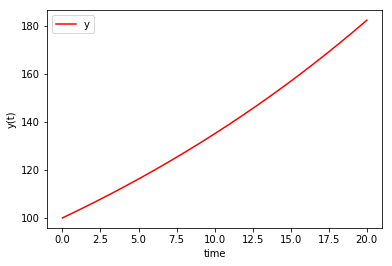

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def ode2(F, t0, h, tfinal, y0 ):
  '''
  F is first order EQ
  t0  is the beginning time 
  h   is the step size
  tfinal is the last time
  y0  is the initial condition
  '''
  # Implement your code here 
  
    
  return (T,yout)


# ตัวอย่าง โมเดลของ compound interest problem (ดอกเบี้ย 3 %)
def model(y,t):
  k = 0.03
  dydt = k*y
  return dydt


y0 = 100  
h  = 0.01
t0 = 0
tend = 20

T, y = ode2(model,t0,h,tend, y0)  # ทำการ solve หา sequence ของ y_0 .... y_20 โดยให้ค่าเริ่มต้น y_0 = 100
plt.plot(T,y,'r',label = 'y')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()



--- 
### ODEINT 
ในปัจจุบัน ODE solver ได้มีการพัฒนามาอย่างต่อเนื่อง ยกตัวอย่างเช่นใน Matlab มีการพัฒนามาถึง version ที่ 45  (เราเรียนเพียงแค่ 2 version เเรกสุด) 
สำหรับ Part นี้ นักศึกษาจะได้ลองใช้ ODE solver module ที่ implement  ใน Python

ODEINT เป็น ODE solver  ที่สามารถเรียกใช้ได้ใน Python ซึ่ง module ตัวนี้จะทำการ encapsulate  lsoda solver อีกทีหนึ่ง   
( http://www.oecd-nea.org/tools/abstract/detail/uscd1227)


นอกเรื่อง : 
ตารางการเปรียบเทียบ ODE solvers ในภาษาต่าง ๆ 
http://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/

### การเรียกใช้  ODEINT  

ทำการ import module จาก scipy 
from scipy.integrate import odeint

การเรียกใช้
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

สรุปการใช้งานหลัก ๆ : ฟังก์ชัน odeint รับ input parameter หลัก ๆ 3 หรือ 4 ตัว

### y = odeint(model, y0,T, args (optional))

### INPUT 
Model :  Ode function  f(y,t, args(option))
               Note: ในกรณีที่ระบบ มีมากกว่า 1 ตัวแปรเราสามารถ กำหนดให้ y เป็น vector ของตัวแปรได้

y0        :  ค่าเริ่มต้น ของ series 
               Note: ในกรณีที่ระบบ มีมากกว่า 1 ตัวแปรเราสามารถ กำหนดให้ v0 เป็น vector ของค่าเริ่มต้นของแต่ละตัวแปรได้

T           :  array ของ time domain ที่ต้องการ  โดยทั่วไปเราจะใช้ linspace ในการสร้าง 

args     :  ในกรณีที่ Model รับ parameters เพิ่มเติมเราสามารถส่ง tuple input ให้กับ model  ได้ 

### OUTPUT 
solution $y_t$


----
ตัวอย่าง :  กำหนดให้ 



$$ \frac{dy(t)}{ dt} =0.3 *y(t) $$
$$ y(0)= 5$$

ทำการ Plot   $y_t,  t = [0-20] $

No handles with labels found to put in legend.


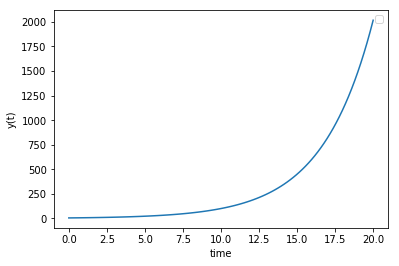

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y,t):
  dydt = 0.3*y  
  return dydt
#  สามารถเขียนให้กระชับลงได้ดังนี้ model = lambda y,t: 0.3*y



# Initial values
y0 = 5
t =  np.linspace(0,20,100)

# Solve for y(t)
y = odeint(model, y0,t)

# Plot 
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

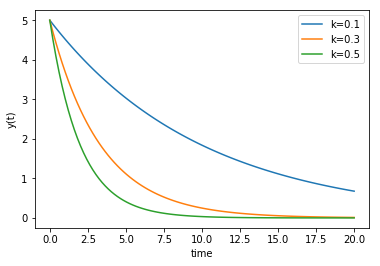

In [0]:
#กรณีที่เรามี arguments k 
def model(y,t,k):
  dydt = -k*y
  return dydt


y0 = 5
t =  np.linspace(0,20,100)
k = 0.1

# args = (k,)  ระบุถึง parameter ซึ่งเป็น tuple (ในกรณีนี้มีสมาชิกเพียงหนึ่งตัว)
y1 = odeint(model, y0,t, (k,))
k = 0.3
y2 = odeint(model, y0,t, (k,))
k = 0.5
y3 = odeint(model, y0,t, (k,))

plt.plot(t,y1,label = 'k=0.1')
plt.plot(t,y2,label = 'k=0.3')
plt.plot(t,y3,label = 'k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

### ให้นักศึกษา Plot $y_t$ จากโมเดลที่กำหนดให้  


$$ \frac{dy(t)}{ dt} = 3y(t) $$
$$ y(0)= 10$$


เพื่อแสดงทำให้เห็นถึง ความแตกต่างของการ update แบบ Euler's, Midpoint Method, และ ODEINT  ให้นักศึกษา  plot $y_t$ ของทั้งสามวิธีด้วย semilogy plot    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


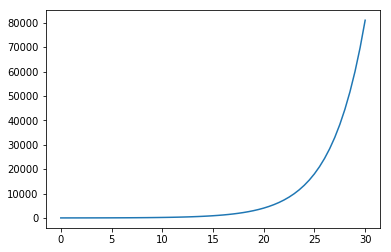

In [0]:
def myModel(y,t):
  #'Implement the given  model here'  
  
  
  return dydt


y0 = 10  
h  = 0.5
t0 = 0
tend = 30

T= np.linspace(t0,tend,(tend-t0)/h+1)

#เขียน code เพื่อแก้สมการ ODE และทำการ plot semilogy ให้นักศึกษาใส่ plot label ของแต่ละวิธีลงไปด้วย (ดูตัวอย่างด้านบน)
y = odeint(model, y0,T)

plt.plot(T,y)


ให้นักศึกษาทดลองลดค่าคงที่ $c$ จาก $y' = cy(t)$  ข้างตนเรากำหนดให้ $c = 3$ ให้เป็นค่าที่มีขนาดเล็กลง   < 1 หรือ กำหนดให้ $y' = y(t) + c $  แล้วสังเกตุผลลัพธ์ของทั้งสามวิธี  

### จากผลทดลองข้างต้นสรุปได้ นักศึกษาสามารถสรุปได้ว่า 
ตอบ :  



--- 
### แบบฝึกหัดที่ 1  จากสมการ ODE ที่กำหนดให้ดังต่อไปนี้ ให้นักศึกษา Plot สมการ y(t)  

$$ \frac{dy(t)}{ dt} = -y(t) + 1 $$
$$ y(0)= 0$$

No handles with labels found to put in legend.


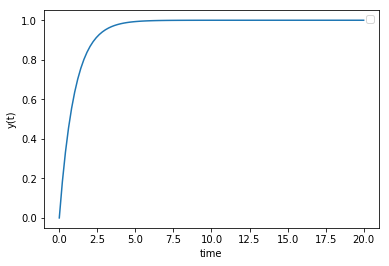

In [0]:
#ให้นักศึกษาทำการ define model จากสมการ ODE ที่กำหนดให้

def model(y,t):
  #Implement the given  model here
  return dydt


y0 = 0
t =  np.linspace(0,20,100)
y = odeint(model, y0,t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

### จาก Model ที่กำหนดให้   มีความสัมพันธ์กับลักษณะของ Solution อย่างไร   ถ้าเปลี่ยน จาก  $y' = -y(t) + 1 $   เป็น    $y' = -y(t) + c $  ลักษณะของกราฟที่ได้ควรจะเป็นอย่างไร 

ตอบ :
  



--- 
### แบบฝึกหัดที่ 2

$$ \frac{5 dy(t)}{dt} = -y(t) + 2u(t)$$ 

$$y(0) = 1$$ 

where  $ u$ เป็น step function จากค่า 0 ไปยัง 1 ที่เวลา $ t = 10$

NOTE:  หน้าที่ของ Step function นั้นคล้าย ๆ กับสวิตเปิดปิด ตามแกนเวลา $u(t < t_0 )=0 $ จนกะทั่ง $t >= t_0 , u(t > =t_0) = 1$  

No handles with labels found to put in legend.


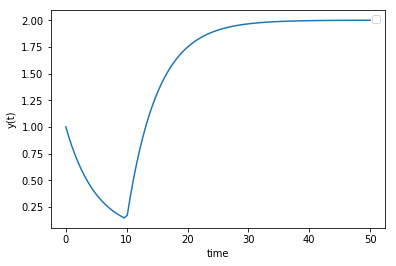

In [0]:
#ให้นักศึกษาทำการ define model จากสมการ ODE ที่กำหนดให้ข้างต้น

def model(y,t):
  #Implement the given  model here

  return dydt


y0 = 1
t =  np.linspace(0,50,100)
y = odeint(model, y0,t)


plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

--- 
### ตัวอย่างที่ 3   ในกรณีที่ model ของเรามีหลายตัวแปร เราสามารถ pack update function ได้ดังต่อไปนี้

$$\frac{dx(t)}{dt} = 3 exp(-t)$$
.
$$ \frac{dy(t)}{dt} = 3 - y(t)$$
Initial condition $$ x(0)= 0 , y(0=0)$$

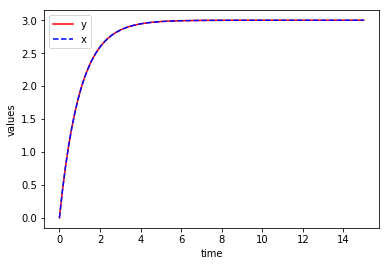

In [0]:
# แบบทีทำละอัน  ซึ่งไม่แนะนำ

def modelx(x,t):
  dxdt = 3*np.exp(-t)
  return dxdt

def modely(y,t):
  dydt = -y +3
  return dydt

t =  np.linspace(0,15,100)
x = odeint(modelx, 0,t)
y = odeint(modely, 0,t)


plt.plot(t,y,'r',label = 'y')
plt.plot(t,x,'b--',label = 'x')
plt.xlabel('time')
plt.ylabel('values')
plt.legend()



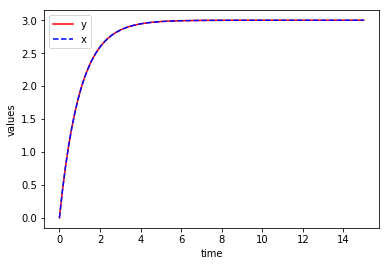

In [0]:
# ให้เขียนแบบนี้แทน

def modelz(z,t):
  x,y = z
  dxdt = 3*np.exp(-t)
  dydt = -y +3
  return [dxdt, dydt]

t =  np.linspace(0,15,100)
z = odeint(modelz, [0,0] ,t)

plt.plot(t,z[:,1],'r',label = 'y')
plt.plot(t,z[:,0],'b--',label = 'x')
plt.xlabel('time')
plt.ylabel('values')
plt.legend()

--- 
### แบบฝึกหัดที่ 4 

$$ \frac{2dx(t)}{dt} = -x(t) + u(t)$$
.
$$  \frac{5 dy(t)}{dt} = -y(t) + x(t) $$
.
$$u = 2S(t-5) $$
.
$$x(0)=0, y(0) = 0$$

โดยที่   $S(t-5)$ เป็น step function ที่เปลี่ยนจาก 0 เป็น 1 ที่เวลา $t = 5$, และเมื่อถูกคูณด้วยค่าคงที่ 2  $u$  จึงเป็น step function ที่เปลี่ยนจาก 0  เป็น 2 ที่เวลา $t = 5$ 

NOTE:  หน้าที่ของ Step function นั้นคล้าย ๆ กับสวิตเปิดปิด ตามแกนเวลา  เมื่อนำไปคูณกับ function ใด ๆ  จึงเหมือนกับการเปิดปิดฟังก์ชั้น นั้น ๆ 

(1000, 2)


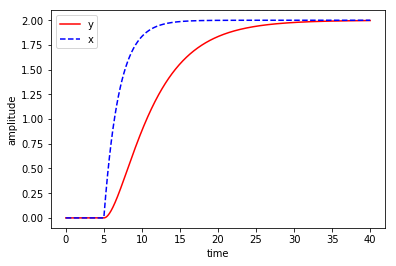

In [0]:
def modelz(z,t):
  # assume z is a tuple of x,y values
  #'Implement the given  model here'

  return dzdt

t =  np.linspace(0,40,1000)
sol = odeint(modelz, [0,0],t)
print(sol.shape) 

plt.plot(t,sol[:,1],'r',label = 'y')
plt.plot(t,sol[:,0],'b--',label = 'x')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
